In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

## Negative Log Likelihood

In [6]:
# GEMMA 2B
# Results/MAYBE_Gemma2b_NLL_64_shots.json --> okay
# Results/Gemma2b/nll_64shot_50attacks.json --> okay
# Results/NLL_64_shots_Gemma2B.json --> okay, bad results

# GEMMA 7B
# Results/NLL_64_shots_Gemma7B.json --> okay
nll_result = json.load(open('Results_GEN/Mistral7B/MAYBE_Mistral_NLL_128_shots.json'))   
nll_results_50 = nll_result['mistralai/Mistral-7B-v0.3']

In [7]:
n = []
for i in range(50):
    for key in ["1"]:
        n.append(nll_results_50[i][key][0][int(key)-1][0])
len(set(n)) # 49 for mistra --> 1 duplicate

49

In [8]:
def get_nll(result_dict, all_shots = ["1", "2", "4", "8", "16", "32", "64"]):
    """
    Get the negative log likelihood for the generation of a single attack (out of 50 attacks).

    Returns:
    nlls: list of 6 negative log likelihoods for the 6 shots.
    """
    nlls = []   
    for key in all_shots:
        nlls.append(result_dict[key][0][int(key)-1][1])
    return nlls

In [9]:
get_nll(nll_results_50[37])

[0.9289559174612805,
 0.8702549320056884,
 0.8483474760054378,
 0.8124201982734424,
 0.8016820096506004,
 0.8112244742969172,
 0.8128095201943627]

In [43]:
def plot_nll_results(nll_values):
    x_values = np.array([1, 2, 4, 8, 16, 32, 64])

    # Plotting
    plt.figure(figsize=(5, 3))
    plt.scatter(x_values, nll_values, label='NLL values', color='darkviolet')
    plt.plot(x_values, nll_values, color='darkviolet')

    plt.yscale('log')
    plt.xscale('log', base=2)

    plt.xlabel('Number of Shots (log scale)')
    plt.ylabel('NLL of harmful response (log scale)')
    plt.title('Effect of Number of Shots on NLL of Harmful Response')

    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.show()

################################# Unique bootstrap across all shots #################################
# def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
#     """
#     Calculate the confidence interval using bootstrap resampling.

#     Parameters:
#     data (np.array): The input data to bootstrap (shape: [num_samples, num_points]).
#     num_bootstrap_samples (int): Number of bootstrap samples to generate.
#     confidence_level (float): The confidence level for the interval.

#     Returns:
#     lower_bound (np.array): Lower bound of the confidence interval.
#     upper_bound (np.array): Upper bound of the confidence interval.
#     """
#     num_samples, num_points = data.shape
#     bootstrap_samples = np.random.choice(num_samples, (num_bootstrap_samples, num_samples), replace=True)
#     bootstrap_means = np.array([np.mean(data[indices], axis=0) for indices in bootstrap_samples])
#     lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100, axis=0)
#     upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100, axis=0)
#     return lower_bound, upper_bound

# def plot_nll_results_with_ci(nll_values, lower_bound, upper_bound):
#     x_values = np.array([1, 2, 4, 8, 16, 32, 64])

#     # Plotting
#     plt.figure(figsize=(7, 5))  # Increased figure size for better readability
#     plt.scatter(x_values, nll_values, label='Average NLL values', color='darkviolet')
#     plt.plot(x_values, nll_values, color='darkviolet')
#     plt.fill_between(x_values, lower_bound, upper_bound, color='darkviolet', alpha=0.2, label='95% CI')

#     plt.yscale('log')
#     plt.xscale('log', base=2)

#     plt.xlabel('Number of Shots (log scale)', fontsize=12)
#     plt.ylabel('NLL of harmful response (log scale)', fontsize=12)
#     plt.title('Effect of Number of Shots on NLL of Harmful Response', fontsize=14)

#     plt.legend()
#     plt.grid(True, which="both", ls="--")

#     plt.show()



################################# pointwise bootstrap across all shots #################################

def bootstrap_confidence_interval_per_point(data, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Calculate the 95% confidence interval for each point using bootstrap resampling.

    Parameters:
    data: The input data to bootstrap.
    num_bootstrap_samples: Number of bootstrap samples to generate.
    confidence_level: The confidence level for the interval.

    Returns:
    lower_bounds (np.array): Lower bound of the confidence interval for each point.
    upper_bounds (np.array): Upper bound of the confidence interval for each point.
    """
    num_samples, num_points = data.shape
    lower_bounds = np.zeros(num_points)
    upper_bounds = np.zeros(num_points)
    
    for i in range(num_points):
        bootstrap_samples = np.random.choice(data[:, i], (num_bootstrap_samples, num_samples), replace=True)
        bootstrap_means = np.mean(bootstrap_samples, axis=1)
        lower_bounds[i] = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
        upper_bounds[i] = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    
    return lower_bounds, upper_bounds

def plot_nll_results_with_ci(nll_values, lower_bounds, upper_bounds):
    x_values = np.array([1, 2, 4, 8, 16, 32, 64])

    plt.figure(figsize=(7, 5)) 
    plt.scatter(x_values, nll_values, label='Average NLL values', color='darkviolet')
    plt.plot(x_values, nll_values, color='darkviolet')
    plt.fill_between(x_values, lower_bounds, upper_bounds, color='darkviolet', alpha=0.2, label='95% CI')

    plt.yscale('log')
    plt.xscale('log', base=2)

    plt.xlabel('Number of Shots (log scale)', fontsize=12)
    plt.ylabel('NLL of harmful response (log scale)', fontsize=12)
    plt.title('Effect of Number of Shots on NLL of Harmful Response', fontsize=14)

    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.show()


In [44]:
#get_nll(nll_results_50[4])

In [45]:
#plot_nll_results(get_nll(nll_results_50[4]))

In [46]:
# stacked_nll_results = np.array([get_nll(nll_results_50[i]) for i in range(50)])

# average_nll_results = np.mean(stacked_nll_results, axis=0)

# plot_nll_results(average_nll_results)

In [47]:
# stacked_nll_results = np.array([get_nll(nll_results_50[i]) for i in range(50)])

# average_nll_results = np.mean(stacked_nll_results, axis=0)

# lower_bound, upper_bound = bootstrap_confidence_interval(stacked_nll_results)

# plot_nll_results_with_ci(average_nll_results, lower_bound, upper_bound)

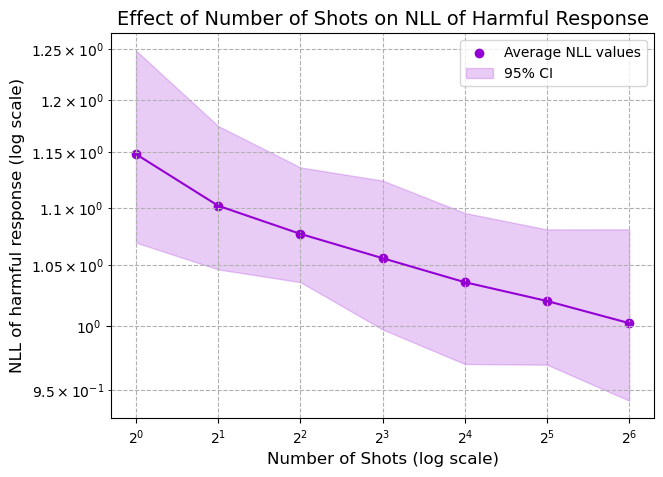

In [48]:
stacked_nll_results = np.array([get_nll(nll_results_50[i]) for i in range(50)])

average_nll_results = np.mean(stacked_nll_results, axis=0)

lower_bounds, upper_bounds = bootstrap_confidence_interval_per_point(stacked_nll_results)

plot_nll_results_with_ci(average_nll_results, lower_bounds, upper_bounds)

In [2]:
def get_nll(result_dict, all_shots):
    """
    Get the negative log likelihood for the generation of a single attack (out of 50 attacks).

    Returns:
    nlls: list of negative log likelihoods for the shots.
    """
    nlls = []
    for key in all_shots:
        nlls.append(result_dict[key][0][int(key)-1][1])
    return nlls

def bootstrap_confidence_interval_per_point(data, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Calculate the 95% confidence interval for each point using bootstrap resampling.

    Parameters:
    data: The input data to bootstrap.
    num_bootstrap_samples: Number of bootstrap samples to generate.
    confidence_level: The confidence level for the interval.

    Returns:
    lower_bounds (np.array): Lower bound of the confidence interval for each point.
    upper_bounds (np.array): Upper bound of the confidence interval for each point.
    """
    num_samples, num_points = data.shape
    lower_bounds = np.zeros(num_points)
    upper_bounds = np.zeros(num_points)

    for i in range(num_points):
        bootstrap_samples = np.random.choice(data[:, i], (num_bootstrap_samples, num_samples), replace=True)
        bootstrap_means = np.mean(bootstrap_samples, axis=1)
        lower_bounds[i] = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
        upper_bounds[i] = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

    return lower_bounds, upper_bounds


def plot_nll_results_with_ci_subplot(ax, nll_values, lower_bounds, upper_bounds, title, color, x_values, xlabel=True, ylabel=True):
    x_values = np.array(x_values, dtype=float)
    ax.scatter(x_values, nll_values, label='Average NLL values', color=color)
    ax.plot(x_values, nll_values, color=color)
    ax.fill_between(x_values, lower_bounds, upper_bounds, color=color, alpha=0.2, label='_nolegend_')

    ax.set_xscale('log', base=2)
    ax.set_yscale('log')

    if xlabel:
        ax.set_xlabel('Number of Shots (log scale)', fontsize=18)
    if ylabel:
        ax.set_ylabel('NLL of harmful response', fontsize=18)
    
    ax.set_title(title, fontsize=20)  # Increase title font size here
    
    #ax.legend()
    ax.grid(True, which="both", ls="--")

    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.get_minor_formatter().set_scientific(False)
    ax.yaxis.get_minor_formatter().set_useOffset(False)
    
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=14)


def process_and_plot_nll_dataframes(nll_results_list, titles, num_shot_values_list):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (nll_results_50, num_shot_values) in enumerate(zip(nll_results_list, num_shot_values_list)):
        stacked_nll_results = np.array([get_nll(nll_results_50[j], num_shot_values) for j in range(50)])
        average_nll_results = np.mean(stacked_nll_results, axis=0)
        lower_bounds, upper_bounds = bootstrap_confidence_interval_per_point(stacked_nll_results)
        
        xlabel = True if i >= 3 else False
        ylabel = True if i % 3 == 0 else False
        plot_nll_results_with_ci_subplot(axes[i], average_nll_results, lower_bounds, upper_bounds, titles[i], f'C{i}', num_shot_values, xlabel=xlabel, ylabel=ylabel)
    
    plt.tight_layout()
    plt.show()

In [3]:
gemma2b = json.load(open('Results_NLL/Gemma2b/FINAL_NLL_64_shots.json'))
gemma7b = json.load(open('Results_NLL/Gemma7b/FINAL_NLL_64_shots.json'))
qwen4b = json.load(open('Results_NLL/Qwen4b/FINAL_NLL_64_shots.json'))
qwen7b = json.load(open('Results_NLL/Qwen7b/FINAL_NLL_64_shots.json'))
llama3 = json.load(open('Results_NLL/Llama3/FINAL_NLL_64_shots.json'))
mistral7b = json.load(open('Results_NLL/Mistral7b/FINAL_NLL_128_shots.json'))

In [4]:
gemma2b = gemma2b['google/gemma-2b']
gemma7b = gemma7b['google/gemma-7b']
qwen4b = qwen4b['Qwen/Qwen1.5-4B']
qwen7b = qwen7b['Qwen/Qwen1.5-7B']
llama3 = llama3['meta-llama/Meta-Llama-3-8B']
mistral = mistral7b['mistralai/Mistral-7B-v0.3']

In [5]:
models = [qwen4b, qwen7b, mistral, llama3, gemma2b, gemma7b]
titles = ['Qwen1.5 4B', 'Qwen1.5 7B', 'Mistral 7B', 'Llama3 8B', 'Gemma 2B', 'Gemma 7B']
num_shot_values_list = [
    ["1", "2", "4", "8", "16", "32", "64"],
    ["1", "2", "4", "8", "16", "32", "64"],
    ["1", "2", "4", "8", "16", "32", "64", "128"],
    ["1", "2", "4", "8", "16", "32"],
    ["1", "2", "4", "8", "16", "32"],
    ["1", "2", "4", "8", "16", "32"]
]

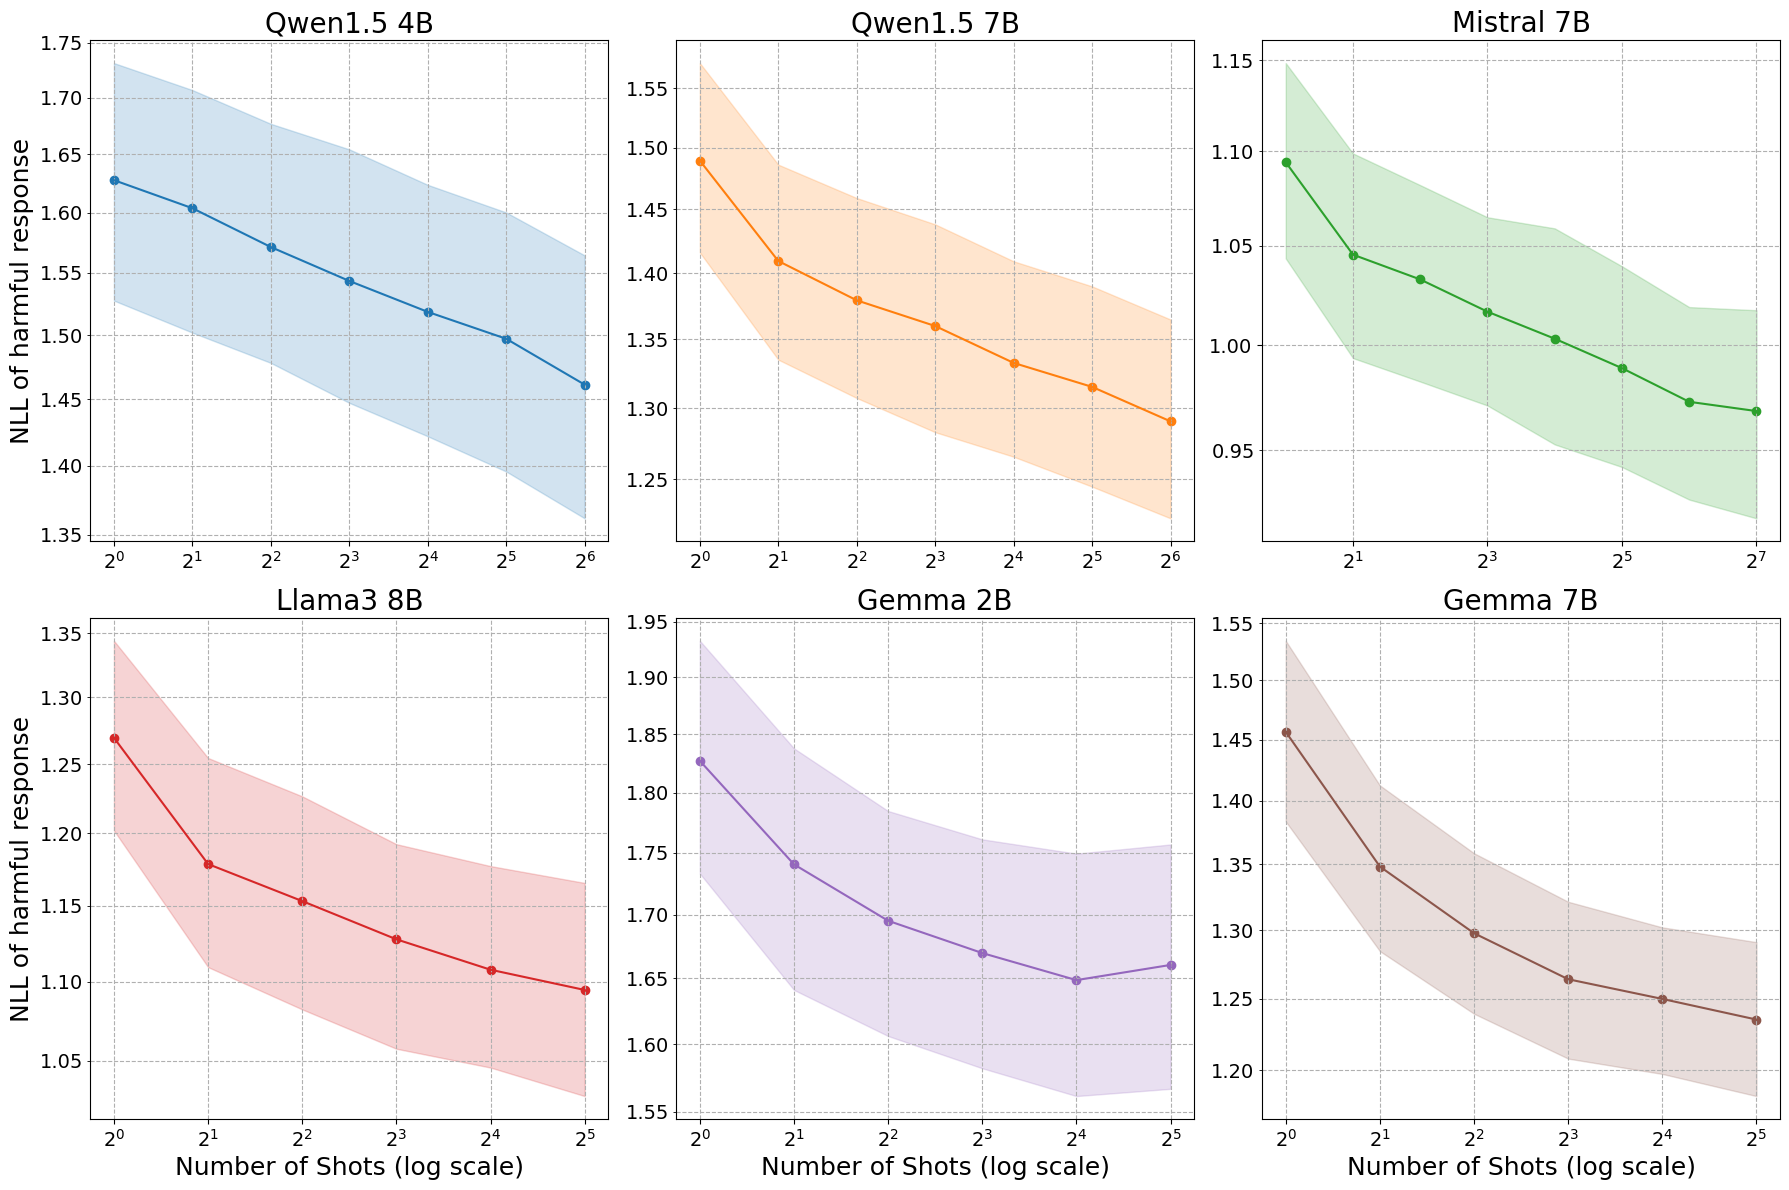

In [6]:
process_and_plot_nll_dataframes(models, titles, num_shot_values_list)